# Проект




Выполнил Капитонов Денис в качестве финального проекта для курса "Принятие решений"

## Идея и метод

### Описание идеи


**Идея сервиса** не нова и основана на рассуждениях и дискуссиях, проведенных во время семинарских занятий в течение последнего модуля.

Одно из самых популярных направлений использования Data Science и систем принятия решений лежит в банковской сфере, где:

(а) высока доля неопределенности;

(б) велика цена ошибки

Поэтому бизнес использует различные математические модели для анализа фрода или для рассчета **кредитного скоринга** - набора моделей и методов принятия решений, которые позволяют кредиторам правильно выбирать своих клиентов.

Для этого используется разные методологические способы - от обычных статистических методов до методов искусственного интеллекта.
В найденной мною статье отмечается, что **Байсевские сети** превосходили логистическую регрессию в диагностических прогнозах и являются отличным средством для подсчета кредитного скоринга (Masmoudi et al., 2019).

### Описание метода

Байесовская сеть (БС) - это графическое представление вероятностной модели, которая содержит набор условных независимых отношений

Особенности:

* Направленный ациклический граф
* Ребра показывают причинно-следственную связь
* Только непосредственные связи
* Заданное условие вероятности "потомков" при условии "предков"
* Ряд ограничений на связи


На основе переменных и данных, собранных от заемщика, BBN может использовать статистические методы для вычисления вероятности успешного возврата кредита. Это позволяет кредитору принять информированное решение о выдаче кредита, исходя из вероятности возможного риска.

Оценка вероятности выдачи или невыдачи кредита с использованием BBN позволяет более точно учитывать различные факторы, связанные с платежеспособностью заемщика, и минимизировать потенциальные финансовые риски для кредитора.

В данном случае Bayesian Belief Network строится для задачи предсказания:

* Мы хотим узнать распределение вероятности целевой переменной (стоит выдавать кредит или нет)
* Позволяет соединять экспертные знания и данные, что будет позже продемонстрировано в коде


### Job Stories и финальная идея

Сервис представляет собой инструмент для предсказания вероятности своевременного погашения кредита клиентом и, следовательно, принятия решения о выдаче кредита. С использованием байесовской нейронной сети (BBN), обученной на исторических данных о клиентах с информацией о платежеспособности и финансовой устойчивости, сервис способен оценить вероятность того, что новый клиент будет выплачивать кредит вовремя.

Сервис работает в определенном отделении известного желтого банка стран СНГ.

**JS 1:**
* Когда на сайт приходит новая клиентская заявка на потребительский кредит, я хочу оценить вероятность того, что этот клиент будет вовремя его выплачивать, чтобы принять решение о том, стоит ли мне одобрить этот кредит или нет

**JS 2:**

* Когда на сайт приходит новая клиентская заявка с ограниченными данными и традиционный способ оценки кредитного скоринга основанный на логистической регрессии не может сработать, я все равно хочу получить объективное мнение машины о том что клиент сможет выплатить кредит или нет, чтобы принять решение о том, стоит ли мне одобрить этот кредит или нет

## Реализация

Для обучения байесовской нейронной сети были использованы [данные Loan Defaulter созданные неизвестным способом на Кеггле](https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter) для развития базового понимания аналитики рисков в банковском деле и финансовых услугах и понимания, как данные используются для минимизации риска потери денег при кредитовании клиентов.

### Загрузка нужных библиотек и данных

In [ ]:
!pip install bnlearn
!pip install pomegranate==0.14.8.
!sudo apt update
!sudo apt install libgraphviz-dev -y
!pip install pygraphviz

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:5 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:7 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Hit:8 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:9 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:10 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
18 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree       
R

In [ ]:
# байсовская тема
from pomegranate import *
from pygraphviz import *
import bnlearn as bn

# классические библиотеки
import numpy as np
import pandas as pd
import random
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

https://github.com/erdogant/bnlearn

https://erdogant.github.io/bnlearn/pages/html/Parameter%20learning.html#conditional-probability-distributions-cpd

https://erdogant.github.io/bnlearn/pages/html/Examples.html#create-a-bayesian-network-learn-its-parameters-from-data-and-perform-the-inference

https://deepnote.com/workspace/personal-workspace-5476-494067ee-59ca-4f70-a2bc-884f657641a5/project/Class-Theory-994a183e-ddff-41e3-907e-56a494caf10e/notebook/06-BBN%2F06_bnn-3f7e2ea34b614ca28605396dcd4dd656

https://colab.research.google.com/drive/1yG8ECE8wpEAKdCPl5Iz70_rQgYATdf6F#scrollTo=yyCDR1SidMfi

https://www.kaggle.com/code/amritachatterjee09/eda-bank-loan-default-risk-analysis/input?select=columns_description.csv

https://colab.research.google.com/drive/1Nia5i7CEAEpHNnW1_yVwkgbHtuNdFj1Q

https://www.kaggle.com/code/srkarthik/bayesian-belief-network/notebook

https://www.kaggle.com/code/irupesh/bank-loan-with-bbn/notebook



СТАРАЯ Х СНИЗУ

https://colab.research.google.com/drive/1Nia5i7CEAEpHNnW1_yVwkgbHtuNdFj1Q

https://colab.research.google.com/drive/1WoV5_mTH9dNaZkINpxdGQ6jGlnfuj0N1

https://colab.research.google.com/drive/1yG8ECE8wpEAKdCPl5Iz70_rQgYATdf6F

https://jupyter.lab.karpov.courses/user/de-kapitonov/tree/dakapitonovv/class_6

https://www.kaggle.com/code/amritachatterjee09/eda-bank-loan-default-risk-analysis/notebook

https://www.kaggle.com/datasets/zaurbegiev/my-dataset

https://www.kaggle.com/code/irupesh/bank-loan-with-bbn/notebook

https://www.kaggle.com/code/srkarthik/bayesian-belief-network/notebook
https://www.kaggle.com/code/vahidahmadi/bayesian-belief-network-table


In [ ]:
data = pd.read_csv('application_data.csv')

In [ ]:
df = data # для перезаписи df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97002 entries, 0 to 97001
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(103), int64(3), object(16)
memory usage: 90.3+ MB


In [ ]:
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Предобработка данных

Как видим, это самая настоящая бигдата с кучей переменных. Впрочем, нам понадобится только определенная часть - возьмем рандомным образом 5к наблюдений по 14 переменным

Переменные выбирал основываясь на [практическом кейсе применения BBN в Кеггле на других данных](https://www.kaggle.com/code/irupesh/bank-loan-with-bbn/notebook), но для той же цели - оценивания кредитного риска

Также опирался на упомянутую ранее статью и банальную логику ("экспертная оценка")

In [ ]:
df = df[['TARGET', 'CODE_GENDER', 'DAYS_BIRTH', 'NAME_CONTRACT_TYPE', 'CNT_CHILDREN',
         'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS',
         'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_EMAIL']]

df = df.sample(5000, random_state = 282)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 95401 to 90120
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TARGET               5000 non-null   int64  
 1   CODE_GENDER          5000 non-null   object 
 2   DAYS_BIRTH           5000 non-null   float64
 3   NAME_CONTRACT_TYPE   5000 non-null   object 
 4   CNT_CHILDREN         5000 non-null   int64  
 5   AMT_INCOME_TOTAL     5000 non-null   float64
 6   AMT_CREDIT           5000 non-null   float64
 7   NAME_EDUCATION_TYPE  5000 non-null   object 
 8   NAME_INCOME_TYPE     5000 non-null   object 
 9   NAME_FAMILY_STATUS   5000 non-null   object 
 10  NAME_HOUSING_TYPE    5000 non-null   object 
 11  DAYS_EMPLOYED        5000 non-null   float64
 12  FLAG_MOBIL           5000 non-null   float64
 13  FLAG_EMAIL           5000 non-null   float64
dtypes: float64(6), int64(2), object(6)
memory usage: 585.9+ KB


Посмотрим на распределение целевой переменной которая так и называется -  Target

1 - клиент с трудностями оплаты: у него/нее была просрочка платежа более X дней

2 - клиент без трудностей оплаты

In [ ]:
df['TARGET'].value_counts(normalize=True)*100

0    92.34
1     7.66
Name: TARGET, dtype: float64

Видим, что всего лишь менее 8 процентов наблюдений с трудностями оплаты.

In [ ]:
df.describe()

,TARGET,DAYS_BIRTH,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL
count,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.0,5000.000000
mean,0.076600,-16029.443000,0.424800,1.666244e+05,5.962166e+05,63705.574000,1.0,0.055800
std,0.265982,4400.637963,0.716134,1.040008e+05,3.970887e+05,141211.642653,0.0,0.229558
min,0.000000,-25173.000000,0.000000,2.565000e+04,4.500000e+04,-16538.000000,1.0,0.000000
25%,0.000000,-19743.250000,0.000000,1.125000e+05,2.700000e+05,-2794.000000,1.0,0.000000
50%,0.000000,-15768.500000,0.000000,1.440000e+05,5.116568e+05,-1195.000000,1.0,0.000000
75%,0.000000,-12363.000000,1.000000,2.025000e+05,8.086500e+05,-288.750000,1.0,0.000000
max,1.000000,-7680.000000,6.000000,3.825000e+06,2.695500e+06,365243.000000,1.0,1.000000


flag_mobil - только 1 - уберем позже

In [ ]:
df.describe(include=['object', 'category'])

,target,gender,contract_type,income,credit,education,occupation,family,housing,email,children,age,experience
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,4101
unique,2,2,2,4,6,5,5,5,6,2,2,5,6
top,Yes,F,Cash loans,100k-200k,200k-400k,Secondary / secondary special,Working,Married,House / apartment,No,No,30-40,1-3
freq,4617,3289,4552,2593,1343,3526,2585,3199,4439,4721,3455,1330,1400


In [ ]:
df.columns = df.columns.str.lower() # снимаем Капс
df = df.drop('flag_mobil', axis = 1)

Смотрим, есть ли какие-то интересные (значимые) корелляции между переменными.

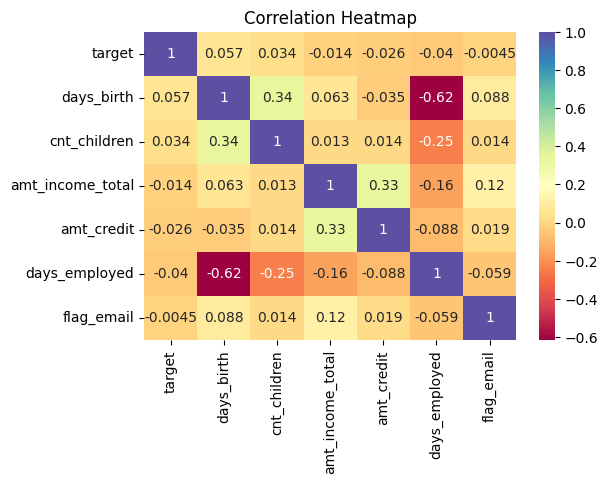

In [ ]:
fig = plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap="Spectral", annot=True)
plt.title("Correlation Heatmap")
plt.show()

Степень корреляции с таргетом - низкая. Нет единой переменной, которая может в соло объяснить разницу с целевой переменной

In [ ]:
df.cnt_children.value_counts() # проще разбить на бинарную - есть дети или нет

0    3455
1    1042
2     439
3      55
4       7
5       1
6       1
Name: cnt_children, dtype: int64

Target: 1 - клиент с трудностями в оплате: у него/нее была просрочка платежа; 0 - не было

В контексте нашей задачи (одобрить кредит или нет), будем одобрять людей которые с меньшей вероятностью будут иметь просрочки платежей, поэтому 0 превратится в Yes, 1 - No

In [ ]:
# есть дети или нет
df['children'] = df['cnt_children'].apply(lambda x: 'Yes' if x > 0 else 'No')
df = df.drop('cnt_children', axis=1)

# меняет бинарные интеджеры на категории (Да и нет)
df.replace({'target': {1: 'No', 0: 'Yes'}, 'flag_email': {1: 'Yes', 0: 'No'}}, inplace=True)

# переименовываем для удобства
df = df.rename(columns={'flag_email': 'email',
                        'code_gender': 'gender',
                        'name_contract_type': 'contract_type',
                        'name_education_type': 'education',
                        'name_income_type': 'occupation_type',
                        'name_family_status': 'family_status',
                        'name_housing_type': 'housing',
                        'amt_income_total': 'income_t',
                        'amt_credit': 'credit_t'
                        })

# избавляемся от негативных дней, тк дни не могут быть отрицательными
date_col = ['days_birth','days_employed']
for col in date_col:
    df[col] = abs(df[col])

df.head(3)

,target,gender,days_birth,contract_type,income_t,credit_t,education,occupation_type,family_status,housing,days_employed,email,children
95401,Yes,F,11791.0,Cash loans,180000.0,545040.0,Higher education,Working,Single / not married,House / apartment,2358.0,No,No
41129,Yes,F,10495.0,Cash loans,144000.0,302206.5,Higher education,Working,Single / not married,With parents,1901.0,No,No
41954,Yes,F,16206.0,Cash loans,112500.0,1005120.0,Secondary / secondary special,Working,Civil marriage,House / apartment,2496.0,No,No


#### Разбиение непрерывных данных на дискретные

Для построения Байсесовской сети важно использовать дискретные (категориальные) данные.



Часть кода я буду брать из [крутого EDA по данному датасету](https://www.kaggle.com/code/amritachatterjee09/eda-bank-loan-default-risk-analysis/notebook)

In [ ]:
# Binning Numerical Columns to create a categorical column

# Creating bins for income amount
df['income_t']=df['income_t']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100k','100k-200k', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

df['income_t']=pd.cut(df['income_t'],bins,labels=slot)

In [ ]:
df['income_t'].value_counts(normalize=True)*100

100k-200k    51.880752
0-100k       20.788315
200k-300k    20.208083
300k-400k     4.761905
400k-500k     1.600640
500k-600k     0.340136
600k-700k     0.220088
800k-900k     0.160064
700k-800k     0.040016
900k-1M       0.000000
1M Above      0.000000
Name: income_t, dtype: float64

Более 50% заявителей имеют доход в диапазоне 100К-200К. Почти 92% заявителей имеют доход менее 300K. Следовательно, имеет смысл разбить на более мелкие категории для удобного построения сети

0-100, 100-200, 200-300, 300+

In [ ]:
# Заменяем категории по условию
df['income_t'] = np.where(df['income_t'].isin(['0-100k', '100k-200k', '200k-300k']), df['income_t'], '300+')

df['income_t'].value_counts(normalize=True)*100

100k-200k    51.86
0-100k       20.78
200k-300k    20.20
300+          7.16
Name: income_t, dtype: float64

In [ ]:
# Creating bins for Credit amount
df['credit_t']=df['credit_t']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100k','100k-200k', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

df['credit_t']=pd.cut(df['credit_t'],bins=bins,labels=slots)

#checking the binning of data and % of data in each category
df['credit_t'].value_counts(normalize=True)*100

200k-300k    17.94
1M Above     15.44
500k-600k    10.96
400k-500k    10.42
100k-200k     9.32
300k-400k     8.92
600k-700k     7.92
800k-900k     7.42
700k-800k     6.32
900k-1M       3.22
0-100k        2.12
Name: credit_t, dtype: float64

В отличие от дохода, сумма кредита гораздо более равномерна распределена

Этот параметр также нужно аккуратно оценить, т.к. чем ниже доход и выше сумма кредита, тем (в теории) должна быть выше вероятность того, что человек просрочит выплату кредита.

Из-за распределения переменных и более аккуратной оценки делим переменную на 5 категорий - 0-200к, 200-400к, 400к-600к, 600к-800к, 800к+

In [ ]:
# Заменяем категории в столбце 'credit_t'
df['credit_t'] = df['credit_t'].replace({
    '0-100K': '0-200k',
    '100K-200K': '0-200k',
    '200k-300k': '200k-400k',
    '300k-400k': '200k-400k',
    '400k-500k': '400k-600k',
    '500k-600k': '400k-600k',
    '600k-700k': '600k-800k',
    '700k-800k': '600k-800k',
    '800k-900k': '800k+',
    '900k-1M': '800k+',
    '1M Above': '800k+'
})

df['credit_t'].value_counts(normalize=True)*100

200k-400k    26.86
800k+        26.08
400k-600k    21.38
600k-800k    14.24
100k-200k     9.32
0-100k        2.12
Name: credit_t, dtype: float64

Также разбиваем *возраст* и *опыт работы*

In [ ]:
# Creating bins for Age
df['age'] = df['days_birth'] // 365
bins = [20,30,40,50,60,100]
slots = ['20-30','30-40','40-50','50-60', '60+']

df['age_group']=pd.cut(df['age'],bins=bins,labels=slots)

#checking the binning of data and % of data in each category
df['age_group'].value_counts(normalize=True)*100

30-40    26.60
40-50    23.80
50-60    21.98
20-30    17.64
60+       9.98
Name: age_group, dtype: float64

In [ ]:
# Creating bins for Employement Time
df['years_employed'] = df['days_employed'] // 365
bins = [-1, 0, 3, 6, 10, 20, 150]
slots = ['<1', '1-3', '3-6', '6-10', '10-20', '20+']

df['years_employed_g']=pd.cut(df['years_employed'],bins=bins,labels=slots)

#checking the binning of data and % of data in each category
df['years_employed_g'].value_counts(normalize=True)*100

1-3      34.138015
3-6      20.385272
6-10     16.995855
10-20    12.557913
<1       11.338698
20+       4.584248
Name: years_employed_g, dtype: float64

#### Дальнейшая предобработка

Проверяем удалось ли адекватно разбить данные

Оцениваем распределение полученных рабочих лет

In [ ]:
df[['years_employed', 'years_employed_g']].query("years_employed == 0").head(2) # проверка

,years_employed,years_employed_g
89067,0.0,<1
19593,0.0,<1


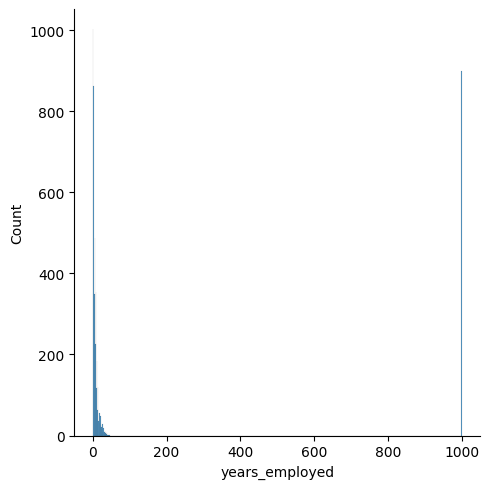

In [ ]:
sns.displot(data = df, x = 'years_employed') # аномалия в данных. надо бы удалить NAшки в итоговом years_employed_g (group)

Видим аномалию в данных. Много наблюдений по какой-то ошибке содержат гигантское число рабочих лет.

Из-за особенности разбиения на когорты в пандасе, эти наблюдения в итоговом датасете уйдут в NAN'ы, которые будут удалены перед построением байсовской сети

Удаляем лишние наблюдения, еще раз переименовываем колонки для удобного прочтения. Смотрим на получившийся датасет (head)

In [ ]:
df = df.drop(['days_birth', 'age', 'days_employed', 'years_employed'], axis = 1)

df = df.rename(columns = {'income_t': 'income',
                          'credit_t': 'credit',
                          'occupation_type': 'occupation',
                          'family_status': 'family',
                          'age_group': 'age',
                          'years_employed_g': 'experience'
                          })
df.head(3)

,target,gender,contract_type,income,credit,education,occupation,family,housing,email,children,age,experience
95401,Yes,F,Cash loans,100k-200k,400k-600k,Higher education,Working,Single / not married,House / apartment,No,No,30-40,3-6
41129,Yes,F,Cash loans,100k-200k,200k-400k,Higher education,Working,Single / not married,With parents,No,No,20-30,3-6
41954,Yes,F,Cash loans,100k-200k,800k+,Secondary / secondary special,Working,Civil marriage,House / apartment,No,No,40-50,3-6


In [ ]:
df.isna().sum()

target             0
gender             0
contract_type      0
income             0
credit             0
education          0
occupation         0
family             0
housing            0
email              0
children           0
age                0
experience       899
dtype: int64

### Построение Байсовской Сети Доверия на данных

#### Pomegranate

В первую очередь я попытаюсь построить несколько вариантов Байсовской Сети с помощью 4-ых алгоритмов, существующих в библиотеке Pomegranate

Далее я оценю их согласно оценки правдоподобия полученных сетей и выберу наилучшую

In [ ]:
mydb = df
mydb = mydb.dropna()
colnames = mydb.columns

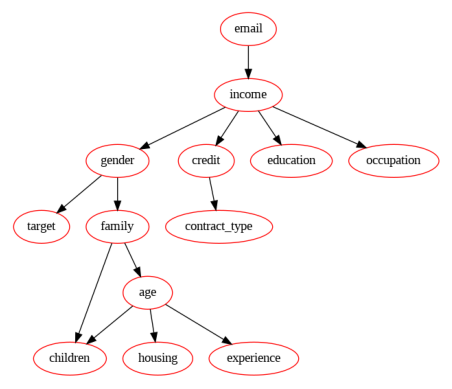

In [ ]:
bnet_dp = BayesianNetwork.from_samples(mydb, algorithm='exact-dp')
for i in range(mydb.shape[1]):
  bnet_dp.states[i].name = colnames[i]
bnet_dp.plot()

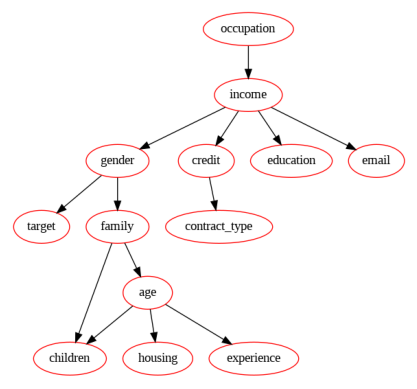

In [ ]:
bnet_e = BayesianNetwork.from_samples(mydb, algorithm='exact')
for i in range(mydb.shape[1]):
  bnet_e.states[i].name = colnames[i]
bnet_e.plot()

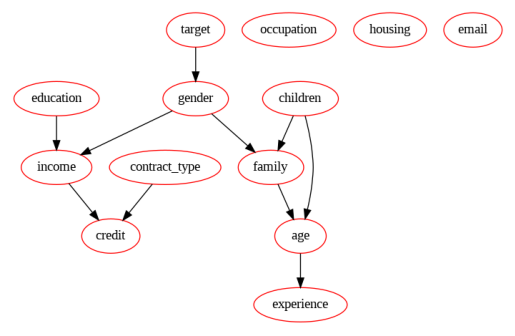

In [ ]:
bnet_g = BayesianNetwork.from_samples(mydb, algorithm='greedy')
for i in range(mydb.shape[1]):
  bnet_g.states[i].name = colnames[i]
bnet_g.plot()

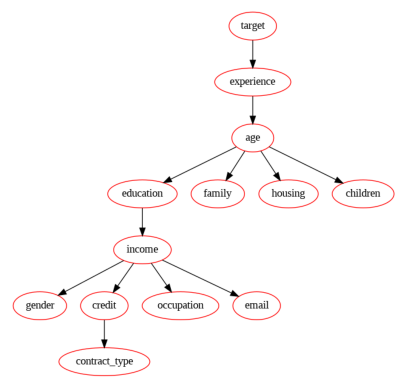

In [ ]:
bnet_cl = BayesianNetwork.from_samples(mydb, algorithm='chow-liu')
for i in range(mydb.shape[1]):
  bnet_cl.states[i].name = colnames[i]
bnet_cl.plot()

Посмотрим на общую оценку (score) правдоподобия полученных сетей (лучше та, где значение ближе к 0)

In [ ]:
X = mydb.to_numpy()

print("Exact:", bnet_e.log_probability(X).sum())
print("Exact-DP:", bnet_dp.log_probability(X).sum())
print("Greedy:", bnet_g.log_probability(X).sum())
print("Chow-Liu:", bnet_cl.log_probability(X).sum())


Exact: -44334.21674346133
Exact-DP: -44334.21674346132
Greedy: -44482.51203718083
Chow-Liu: -44436.00046876422


* Два алгоритма Exact оказались лучше других

* Greedy ненамного лучше Chow-Liu, но в ней не используются все переменные

Киллер-фичей Exact алгоритма заключается в том, что он обеспечивает точные результаты без приближений или упрощений. Это особенно полезно в случаях, когда точность является первостепенной важностью, например, в медицинских или **финансовых приложениях**, где неверные вероятности могут привести к неправильным решениям или оценкам риска.

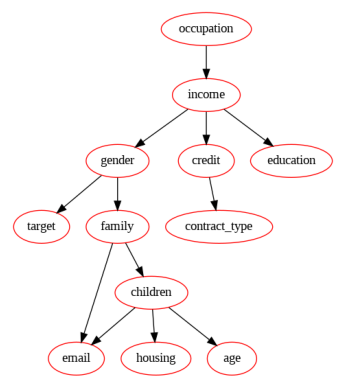

In [ ]:
bnet_e = BayesianNetwork.from_samples(mydb, algorithm='exact')
for i in range(mydb.shape[1]):
  bnet_e.states[i].name = colnames[i]
bnet_e.plot()

В некоторых алгоритмах target являлся переменной без предка, что не имеет смысла для нашей задачи. В Exact алгоритме на таргетную переменную оказывают влияние роль занятости, доход и гендер, а все остальные переменные имеют лишь опосредованное отношение.

#### Bnlearn

Поэтому я попробую использовать более продвинутую и популярную в последнее время библиотеку bnlearn и посмотрю, что получилось там

По умолчанию используется алгоритм Hill-Climbing и мера качества BIC

[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


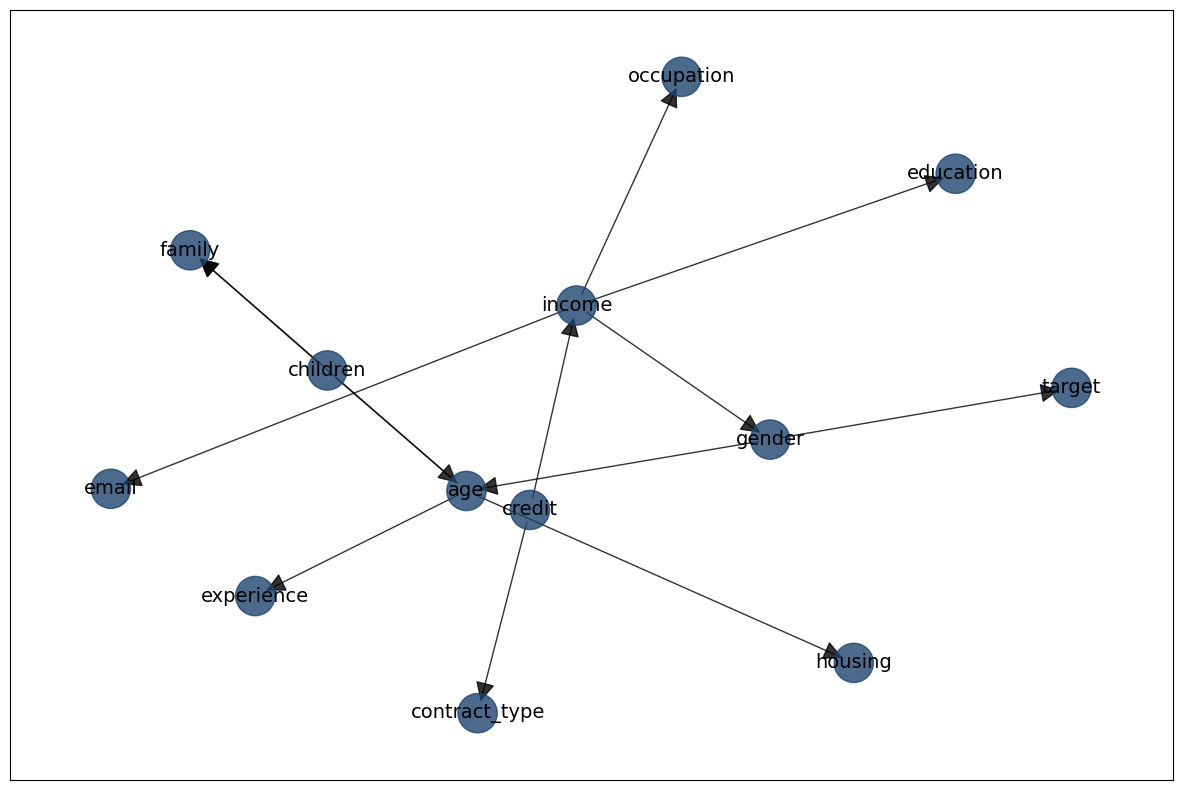

In [ ]:
model = bn.structure_learning.fit(mydb)
G = bn.plot(model)

In [ ]:
# model_ex = bn.structure_learning.fit(mydb, methodtype='ex', scoretype='bic')
# bn.plot(model_ex)

# более 22 минут считается, выключил.

Получается запутанная сеть. Посмотрим как под нее подфитятся реальные данные (просчитаем таблицы вероятности)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of gender:
+-----------+---------------------+-----+---------------------+
| income    | income(0-100k)      | ... | income(300+)        |
+-----------+---------------------+-----+---------------------+
| gender(F) | 0.7222808870116156  | ... | 0.47189097103918226 |
+-----------+---------------------+-----+---------------------+
| gender(M) | 0.27771911298838436 | ... | 0.5281090289608177  |
+-----------+---------------------+-----+---------------------+
[bnlearn] >CPD of target:
+-------------+--------------------+---------------------+
| gender      | gender(F)          | gender(M)           |
+-------------+--------------------+---------------------+
| target(No)  | 0.1393148450244698 | 0.20039292730844793 |
+-------------+--------------------+---------------------+
| target(Ye

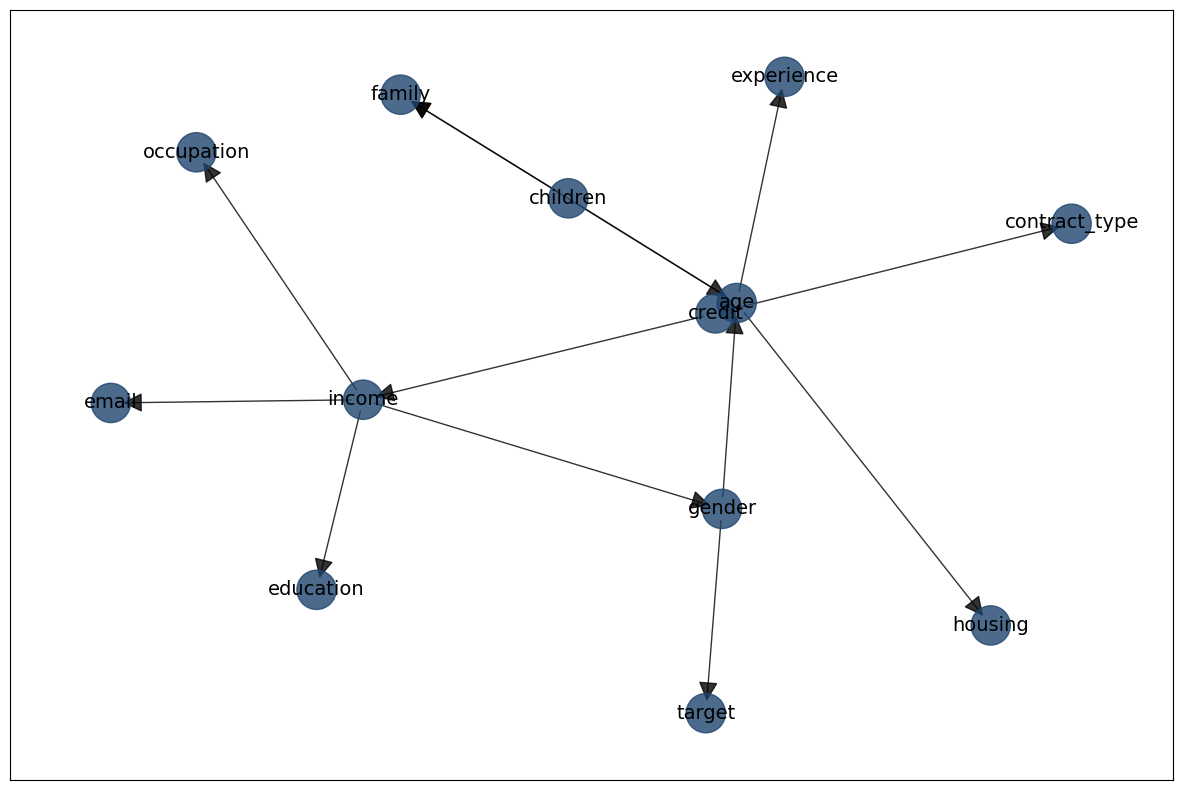

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'target': array([ 0.23312539, -1.        ]),
  'gender': array([ 0.26585518, -0.43122591]),
  'contract_type': array([0.97566841, 0.36273707]),
  'income': array([-0.46239126, -0.12722863]),
  'credit': array([0.25257129, 0.11307019]),
  'education': array([-0.55711033, -0.65657676]),
  'occupation': array([-0.80093173,  0.56165464]),
  'family': array([-0.38643031,  0.72208628]),
  'housing': array([ 0.81137731, -0.75572762]),
  'email': array([-0.97458263, -0.13617591]),
  'children': array([-0.04584881,  0.43349583]),
  'age': array([0.29577844, 0.14207059]),
  'experience': array([0.39291903, 0.77182024])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f0fb1f13400>,
 'node_properties': {'target': {'node_color': '#1f456e', 'node_size': 800},
  'gender': {'node_color': '#1f456e', 'node_size': 800},
  'contract_type': {'node_color': '#1f456e', 'node_size': 800},
  'income': {'node_color':

In [ ]:
model_update = bn.parameter_learning.fit(model, mydb)
bn.plot(model_update)

Можно заметить, что рисунок сети немного поменялся.

Давайте представим на секунду, что это модель описывает реальное положение вещей. Получается, аналитик в банке должен выдавать кредит, основываясь исключительно на гендере обратящегося за кредитом человека?

### Примеры работы алгоритма, попытка 1

Сравним два примера использования сети на двух людях, обратящихся в банк за кредитом. Информация, которую мы знаем о них, указана в блоке evidence

In [ ]:
bn.inference.fit(model_update, variables=['target'],
                      evidence={'age':'20-30', 'income': '0-100k', 'credit':'800k+', 'gender': 'M', 'children': 'No', 'family': 'Married'})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+----------+----------+
|    | target   |        p |
+====+==========+==========+
|  0 | No       | 0.200393 |
+----+----------+----------+
|  1 | Yes      | 0.799607 |
+----+----------+----------+


<DiscreteFactor representing phi(target:2) at 0x7f0fb1f132b0>

In [ ]:
# mydb.income.value_counts()

100k-200k    2174
200k-300k     893
0-100k        697
300+          337
Name: income, dtype: int64

In [ ]:
bn.inference.fit(model_update, variables=['target'],
                      evidence={'age':'30-40', 'income': '300+', 'credit':'200k-400k', 'gender': 'M', 'children': 'Yes'})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+----------+----------+
|    | target   |        p |
+====+==========+==========+
|  0 | No       | 0.200393 |
+----+----------+----------+
|  1 | Yes      | 0.799607 |
+----+----------+----------+


<DiscreteFactor representing phi(target:2) at 0x7f0fb1ed23e0>

Что мы видим? Мы видим абсолютно одинаковое распределение вероятности несмотря на кардинальные различия в характеристиках у людей которые обратились к нам в банк.

Такой сценарий использования сервиса абсолютно нежизнеспособен.

### Построение Байсовской Сети доверия экспертно

Есть несколько способов построения Байсовской Сети Доверия: полностью экспертно, полностью на данных и комбинированный подход. Именно последний я буду использовать в этот раз:

* Структуру я задам экспертно, основываясь на прочитанных мною материалов и банальной логике. Дальше я "скормлю" эту структуру данным, с помощью которых будут просчитаны условные распределения вероятностей

In [ ]:
mydb.head(3)

,target,gender,contract_type,income,credit,education,occupation,family,housing,email,children,age,experience
95401,Yes,F,Cash loans,100k-200k,400k-600k,Higher education,Working,Single / not married,House / apartment,No,No,30-40,3-6
41129,Yes,F,Cash loans,100k-200k,200k-400k,Higher education,Working,Single / not married,With parents,No,No,20-30,3-6
41954,Yes,F,Cash loans,100k-200k,800k+,Secondary / secondary special,Working,Civil marriage,House / apartment,No,No,40-50,3-6


Также пришла пора объяснить все переменные, входящие в финальный датасет:

* Target - одобрять ли кредит человеку
* Gender - гендер
* Contract_type - является ли кредит наличным или возобновляемым

В целом, возобновляемые кредиты предоставляют постоянный доступ к заранее определенному кредитному лимиту, позволяя заемщикам брать, погашать и снова брать кредиты в пределах этого лимита. Кредиты наличными, с другой стороны, предполагают единовременную выдачу фиксированной суммы кредита, которая погашается регулярными частями до полного погашения кредита.

* income - доход по категориям
* credit - сумма кредита по категориям
* education - тип образования
* occupation - какую профессию имеет клиент
* family - семейный статус
* housing - жилищная ситуация клиента (снимает, живет с родителями и тд)
* email - предоставил ли эмейл
* children - есть ли дети
* age - возрастная группа
* experience - время работы на текущем месте

Использованные материалы:
* Статья ([тык](https://linkinghub.elsevier.com/retrieve/pii/S0957417419301769))
* Ноутбук Python с построением BBN для той же цели на других данных ([тык](https://www.kaggle.com/code/irupesh/bank-loan-with-bbn/notebook))
* Логика

Некоторые мои измышления:

Итак, возраст может влияет на множество переменных, это понятно.

Тип семьи (например, есть ли юридический партнер) с большей вероятностью даст понимание, есть ли дети, а также может указать на жилищные условия

Люди с детьми чаще берут кредиты.

От суммы кредита зависит тип пополнений (contract_type)

Мы живем в мире, где в среднем есть различия по доходу по гендеру из-за различных социальных причин

Образование влияет на доход и тип занятости

Тип занятости влияет на доход

Рабочий опыт влияет на доход

Доход влияет на объем кредита и в совокупности вместе с суммой кредита определяет, сможет ли человек покрыть кредит


[bnlearn] >bayes DAG created.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


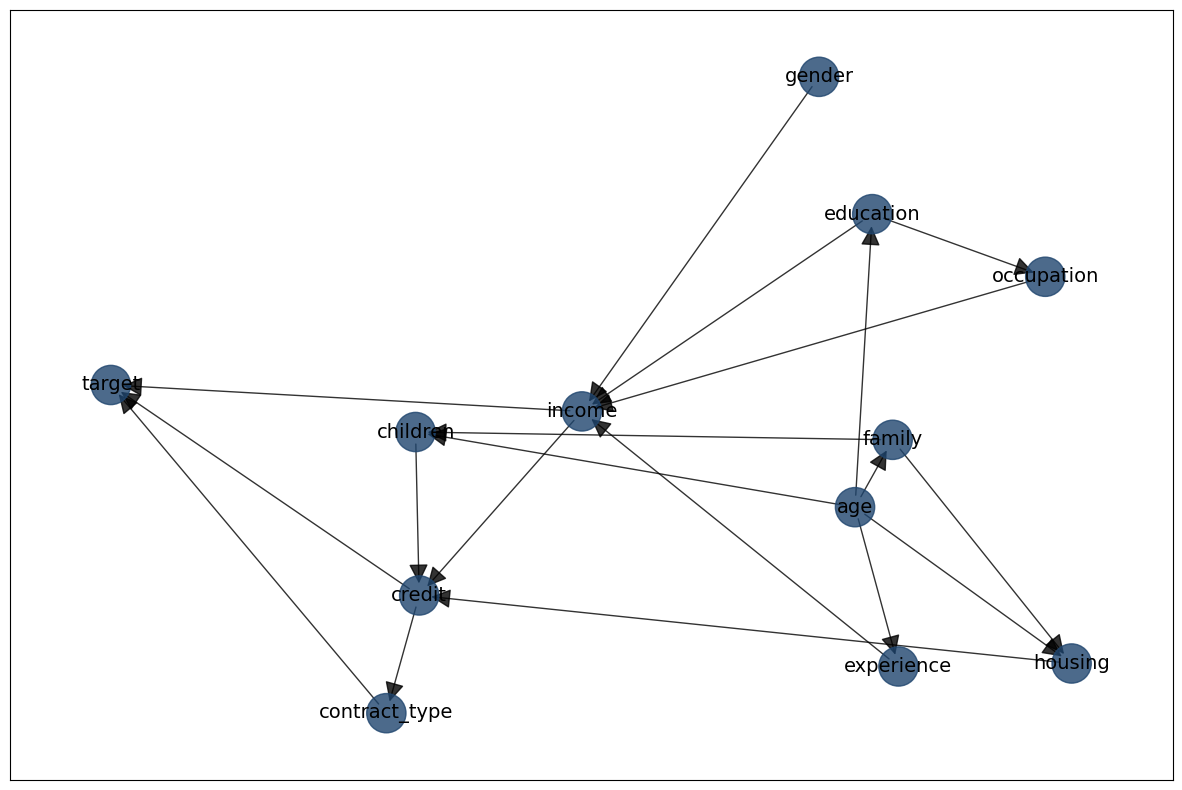

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'age': array([ 0.26888396, -0.1148098 ]),
  'education': array([0.29822129, 0.45828313]),
  'experience': array([ 0.34286605, -0.42632942]),
  'children': array([-0.480462 ,  0.0322042]),
  'family': array([0.33301885, 0.01694166]),
  'housing': array([ 0.6381776, -0.4205046]),
  'credit': array([-0.47428057, -0.28745834]),
  'contract_type': array([-0.53027746, -0.51767651]),
  'gender': array([0.20744056, 0.72685712]),
  'income': array([-0.19682808,  0.07249747]),
  'occupation': array([0.5932398 , 0.33582782]),
  'target': array([-1.        ,  0.12416727])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f0fb1fa2a70>,
 'node_properties': {'age': {'node_color': '#1f456e', 'node_size': 800},
  'education': {'node_color': '#1f456e', 'node_size': 800},
  'experience': {'node_color': '#1f456e', 'node_size': 800},
  'children': {'node_color': '#1f456e', 'node_size': 800},
  'family': {'node_c

In [ ]:
edges = [('age', 'education'),
         ('age', 'experience'),
         ('age', 'children'),
         ('age', 'family'),
         ('age', 'housing'),
         ('age', 'children'),
         ('family', 'children'),
         ('children', 'credit'),
         ('credit', 'contract_type'),
         ('family', 'housing'),
         ('housing', 'credit'),
         ('gender', 'income'),
         ('education', 'income'),
         ('education', 'occupation'),
         ('occupation', 'income'),
         ('experience', 'income'),
         ('income', 'target'),
         ('income', 'credit'),
         ('credit', 'target'),
         ('contract_type', 'target')]

DAG = bn.make_DAG(edges)
# [BNLEARN] Bayesian DAG created.

bn.plot(DAG)

В результате получаем гораздо более продуманный DAG, где Таргет является итогом перечисленных переменных

Подфичиваем с помощью метода максимального подобия

In [ ]:
DAG = bn.parameter_learning.fit(DAG, mydb, methodtype='maximumlikelihood')


[bnlearn] >Removing columns from dataframe to make consistent with DAG [['email']]
[bnlearn] >Parameter learning> Computing parameters using [maximumlikelihood]
[bnlearn] >CPD of age:
+------------+-----------+
| age(20-30) | 0.214338  |
+------------+-----------+
| age(30-40) | 0.322604  |
+------------+-----------+
| age(40-50) | 0.282614  |
+------------+-----------+
| age(50-60) | 0.160449  |
+------------+-----------+
| age(60+)   | 0.0199951 |
+------------+-----------+
[bnlearn] >CPD of education:
+-----+----------------------+
| ... | age(60+)             |
+-----+----------------------+
| ... | 0.0                  |
+-----+----------------------+
| ... | 0.3048780487804878   |
+-----+----------------------+
| ... | 0.012195121951219513 |
+-----+----------------------+
| ... | 0.024390243902439025 |
+-----+----------------------+
| ... | 0.6585365853658537   |
+-----+----------------------+
[bnlearn] >CPD of experience:
+-------------------+-----+---------------------+
| age  

## Примеры работы алгоритма, настоящая попытка

In [ ]:
mydb.head(3)

,target,gender,contract_type,income,credit,education,occupation,family,housing,children,age,experience
95401,Yes,F,Cash loans,100k-200k,400k-600k,Higher education,Working,Single / not married,House / apartment,No,30-40,3-6
41129,Yes,F,Cash loans,100k-200k,200k-400k,Higher education,Working,Single / not married,With parents,No,20-30,3-6
41954,Yes,F,Cash loans,100k-200k,800k+,Secondary / secondary special,Working,Civil marriage,House / apartment,No,40-50,3-6


In [ ]:
mydb.family.unique()

array(['Single / not married', 'Civil marriage', 'Married', 'Widow',
       'Separated'], dtype=object)

Вспоминаем JS-1: мы знаем +- все характеристики, смотрим, стоит ли давать одобрение на кредит
Юноша, без детей, низкий доход, нужно кешэм, все еще живет с родителями

In [ ]:
bn.inference.fit(DAG, variables=['target'],
                      evidence={'age':'20-30', 'income': '0-100k', 'credit':'800k+',
                                'contract_type': 'Cash loans', 'gender': 'M', 'children': 'No',
                                'family': 'Single / not married', 'housing': 'With parents'})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+----------+-----------+
|    | target   |         p |
+====+==========+===========+
|  0 | No       | 0.0379747 |
+----+----------+-----------+
|  1 | Yes      | 0.962025  |
+----+----------+-----------+


<DiscreteFactor representing phi(target:2) at 0x7f0fb1fa3fd0>

Модель говорит что стоит выдасть

Вспоминаем JS-2: ограниченная информация. Помощь системы:

In [ ]:
bn.inference.fit(DAG, variables=['target'],
                      evidence={'credit':'800k+', 'income': '0-100k', 'contract_type': 'Revolving loans'})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+----------+-----+
|    | target   |   p |
+====+==========+=====+
|  0 | No       | 0.5 |
+----+----------+-----+
|  1 | Yes      | 0.5 |
+----+----------+-----+


<DiscreteFactor representing phi(target:2) at 0x7f0fb1fa23e0>

Вероятность того, что клиент будет вовремя платить взносы: 50/50. Нужна дополнительная ручная проверка клиента, либо автоматически отказываем: риск слишком высок.

In [ ]:
mydb['target'].value_counts(normalize=True)*100

Yes    91.831261
No      8.168739
Name: target, dtype: float64

Из-за особенностей данных (намного больше описанных случаев где человек вовремя платит кредит) модель с перекосом работает в сторону постоянного одобрения кредита (вероятность выше 0.8). Так или иначе, это вопрос исключительно качества найденных реальных данных - если бы данные были сбалансированны по количеству просрочек, модель предсказала бы другие вероятности

Тем не менее, даже с такими данными мы можем сравнивать различные кейсы людей подающих на кредит - как мы видим, людей с разными параметрами модель оценивает по разному.

In [ ]:
bn.inference.fit(DAG, variables=['target'],
                      evidence={'age':'40-50', 'income': '200k-300k', 'credit':'400k-600k',
                                'gender': 'F', 'children': 'No',
                                'family': 'Single / not married', 'housing': 'House / apartment'})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+----------+-----------+
|    | target   |         p |
+====+==========+===========+
|  0 | No       | 0.0815496 |
+----+----------+-----------+
|  1 | Yes      | 0.91845   |
+----+----------+-----------+


<DiscreteFactor representing phi(target:2) at 0x7f0fb14fb100>

In [ ]:
bn.inference.fit(DAG, variables=['target'],
                      evidence={'age':'40-50', 'income': '200k-300k', 'credit':'400k-600k',
                                'contract_type': 'Revolving loans', 'gender': 'M', 'children': 'Yes',
                                'family': 'Widow', 'housing': 'Rented apartment'})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+----------+-----------+
|    | target   |         p |
+====+==========+===========+
|  0 | No       | 0.0666667 |
+----+----------+-----------+
|  1 | Yes      | 0.933333  |
+----+----------+-----------+


<DiscreteFactor representing phi(target:2) at 0x7f0fb1ed1150>

BNlearn позволяет нам построить таблицы условных вероятностей

In [ ]:
# Print the CPD for the model
CPDs = bn.print_CPD(DAG)

# Deeper investigate the CPDs
CPDs.keys()

Выходные данные были обрезаны до нескольких последних строк (5000).
(housing ⟂ target, experience, gender, contract_type, occupation, education | income, age, credit, children)
(housing ⟂ target, contract_type | income, family, credit, children)
(housing ⟂ target, contract_type | income, occupation, credit, children)
(housing ⟂ target, contract_type | education, income, credit, children)
(housing ⟂ occupation, experience, education | gender, income, age, children)
(housing ⟂ gender, occupation, experience, education | contract_type, income, age, children)
(housing ⟂ gender, occupation, experience, education | family, income, age, children)
(housing ⟂ gender, experience, education | income, age, occupation, children)
(housing ⟂ gender, occupation, experience | education, income, age, children)
(housing ⟂ contract_type | gender, target, income, credit)
(housing ⟂ experience, contract_type, gender, occupation, education | target, income, age, credit)
(housing ⟂ contract_type | target, inc

dict_keys(['age', 'education', 'experience', 'children', 'family', 'housing', 'credit', 'contract_type', 'gender', 'income', 'occupation', 'target'])

Можем повнимательнее изучать таблицу вероятностей таргетной переменной

In [ ]:
CPDs['target']

,target,contract_type,credit,income,p
0,No,Cash loans,0-100k,0-100k,0.083333
1,No,Cash loans,0-100k,100k-200k,0.085714
2,No,Cash loans,0-100k,200k-300k,0.142857
3,No,Cash loans,0-100k,300+,0.500000
4,No,Cash loans,100k-200k,0-100k,0.036585
...,...,...,...,...,...
91,Yes,Revolving loans,600k-800k,300+,1.000000
92,Yes,Revolving loans,800k+,0-100k,0.500000
93,Yes,Revolving loans,800k+,100k-200k,1.000000
94,Yes,Revolving loans,800k+,200k-300k,1.000000


In [ ]:
CPDs['target'].query("target == 'No'").sort_values('p', ascending = False)

,target,contract_type,credit,income,p
24,No,Revolving loans,0-100k,0-100k,0.500000
40,No,Revolving loans,600k-800k,0-100k,0.500000
26,No,Revolving loans,0-100k,200k-300k,0.500000
27,No,Revolving loans,0-100k,300+,0.500000
25,No,Revolving loans,0-100k,100k-200k,0.500000
3,No,Cash loans,0-100k,300+,0.500000
44,No,Revolving loans,800k+,0-100k,0.500000
35,No,Revolving loans,200k-400k,300+,0.250000
39,No,Revolving loans,400k-600k,300+,0.200000
2,No,Cash loans,0-100k,200k-300k,0.142857


### Задача со звездочкой.

Попытаемся просимулировать данные с помощью построенной сети, затем проапдейтить нынешний вариант модели и посмотреть, есть ли разница с точки зрения вероятностей

In [ ]:
df_resimulated = bn.sampling(DAG, n=350)
df_resimulated

,age,education,experience,children,family,housing,credit,contract_type,gender,income,occupation,target
0,50-60,Secondary / secondary special,1-3,No,Married,House / apartment,200k-400k,Cash loans,F,100k-200k,Working,Yes
1,40-50,Secondary / secondary special,10-20,No,Married,House / apartment,200k-400k,Cash loans,M,200k-300k,Working,Yes
2,30-40,Higher education,1-3,No,Single / not married,House / apartment,800k+,Cash loans,F,100k-200k,Commercial associate,Yes
3,30-40,Higher education,6-10,No,Married,House / apartment,400k-600k,Cash loans,F,100k-200k,Working,Yes
4,50-60,Secondary / secondary special,20+,No,Married,House / apartment,400k-600k,Cash loans,F,100k-200k,Working,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
345,40-50,Secondary / secondary special,6-10,Yes,Married,Municipal apartment,200k-400k,Cash loans,M,100k-200k,Commercial associate,Yes
346,20-30,Incomplete higher,1-3,No,Single / not married,House / apartment,800k+,Cash loans,F,200k-300k,Working,Yes
347,30-40,Higher education,3-6,No,Married,House / apartment,800k+,Cash loans,F,100k-200k,Commercial associate,No
348,50-60,Higher education,10-20,No,Widow,House / apartment,800k+,Cash loans,F,100k-200k,Working,Yes


In [ ]:
df_resimulated['target'].value_counts(normalize=True)*100 # как минимум, распределение +- то же

Yes    91.428571
No      8.571429
Name: target, dtype: float64

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of age:
+------------+----------+
| age(20-30) | 0.204444 |
+------------+----------+
| age(30-40) | 0.234074 |
+------------+----------+
| age(40-50) | 0.215556 |
+------------+----------+
| age(50-60) | 0.193333 |
+------------+----------+
| age(60+)   | 0.152593 |
+------------+----------+
[bnlearn] >CPD of education:
+-----+---------------------+
| ... | age(60+)            |
+-----+---------------------+
| ... | 0.24757281553398058 |
+-----+---------------------+
| ... | 0.24271844660194175 |
+-----+---------------------+
| ... | 0.24757281553398058 |
+-----+---------------------+
| ... | 0.2621359223300971  |
+-----+---------------------+
[bnlearn] >CPD of experience:
+-------------------+-----+---------------------+
| age               | ... | age(60+)            |
+-------------------+-----+---------------------+
| experience(1-3)   | ... | 0.16181229773462782 |
+-------------------+-----+---------

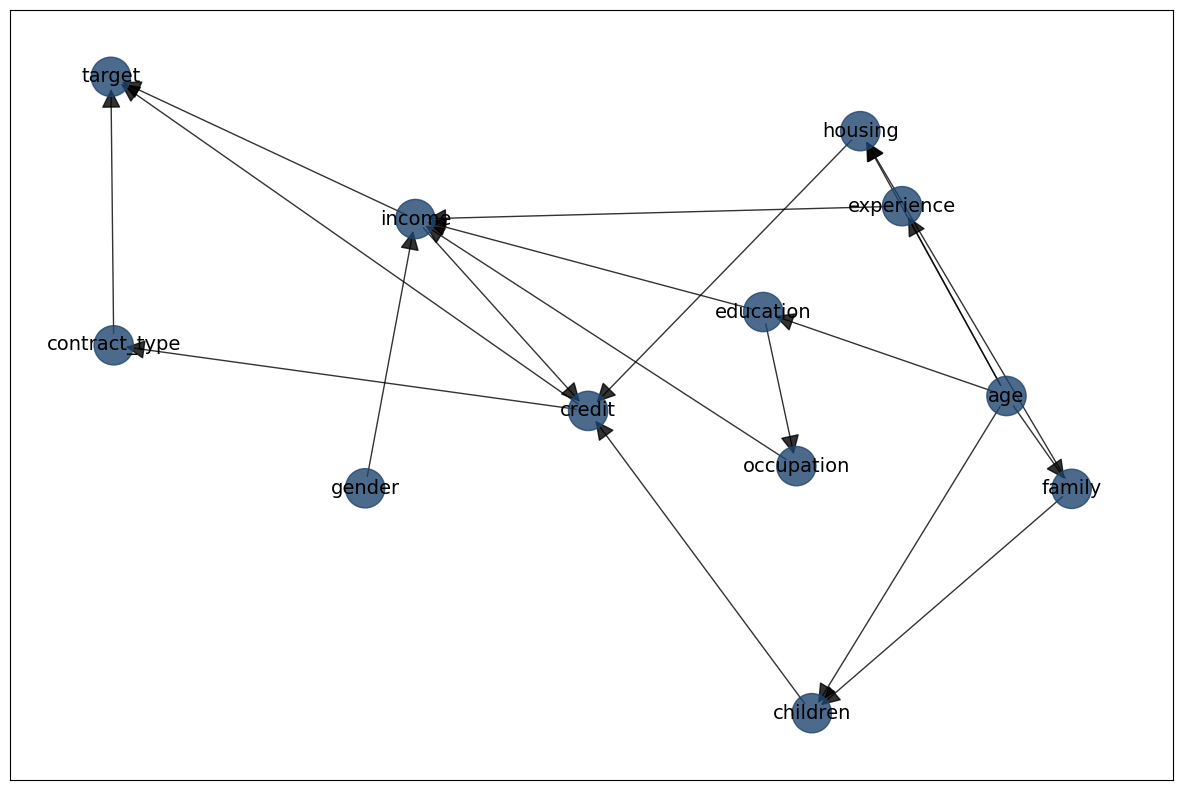

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'age': array([ 0.65994635, -0.09506188]),
  'education': array([0.20902426, 0.09723748]),
  'experience': array([0.46646511, 0.33957176]),
  'children': array([ 0.29918546, -0.82127884]),
  'family': array([ 0.78070383, -0.3075962 ]),
  'housing': array([0.38891421, 0.51133177]),
  'credit': array([-0.11544825, -0.129155  ]),
  'contract_type': array([-0.9947137 ,  0.02097462]),
  'gender': array([-0.5288181 , -0.30631903]),
  'income': array([-0.43569489,  0.31014925]),
  'occupation': array([ 0.27043572, -0.25563183]),
  'target': array([-1.        ,  0.63577789])},
 'G': <networkx.classes.digraph.DiGraph at 0x7f0facb758d0>,
 'node_properties': {'age': {'node_color': '#1f456e', 'node_size': 800},
  'education': {'node_color': '#1f456e', 'node_size': 800},
  'experience': {'node_color': '#1f456e', 'node_size': 800},
  'children': {'node_color': '#1f456e', 'node_size': 800},
  'family': {'

In [ ]:
model_update_ = bn.parameter_learning.fit(DAG, df_resimulated)
bn.plot(model_update_)

In [ ]:
bn.inference.fit(model_update_, variables=['target'],
                      evidence={'age':'40-50', 'income': '200k-300k', 'credit':'400k-600k',
                                'gender': 'F', 'children': 'No',
                                'family': 'Single / not married', 'housing': 'House / apartment'})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+----------+----------+
|    | target   |        p |
+====+==========+==========+
|  0 | No       | 0.407445 |
+----+----------+----------+
|  1 | Yes      | 0.592555 |
+----+----------+----------+


<DiscreteFactor representing phi(target:2) at 0x7f0facb77430>

Вот что было в прошлой модели при тех же самых данных:

```
+----+----------+-----------+
|    | target   |         p |
+====+==========+===========+
|  0 | No       | 0.0815496 |
+----+----------+-----------+
|  1 | Yes      | 0.91845   |
+----+----------+-----------+
```

Действительно, вероятностное распределение изменилось!


## Итог

В данной работе была проделана работа по теоретическому использовани метода Байсовской Сети Доверия для задачи прогнозирования будет ли клиент банка вовремя выплачивать кредит, а следовательно позволит принимать решение о том, стоит ли одобрять такому клиенту кредит на таких основаниях

Работа была выполнена опираясь на реальный пример использования BBN в банковской сфере, на реальных данных с Kaggle. В будущем система может быть значительно доработана, в первую очередь, засчет более валидных данных, а также с привлечением реальных экспертов в области банковской сферы.

С технической точки зрения в будущем также можно улучшить систему интерфейса, бекэнда, подкрутить БД и тд.

В целом, оценка вероятности выдачи кредита с помощью системы принятия решений позволяет банкам и финансовым учреждениям принимать информированные решения, минимизируя возможные риски и повышая эффективность процесса выдачи кредитов. Однако следует отметить, что система принятия решений является лишь инструментом, и окончательное решение о выдаче кредита должно приниматься с учетом экспертных знаний, регулирования и политики финансового учреждения.

# Источники

1. Masmoudi, K., Abid, L., & Masmoudi, A. (2019). Credit risk modeling using Bayesian network with a latent variable. Expert Systems with Applications, 127, 157–166. https://doi.org/10.1016/j.eswa.2019.03.014
2. Loan Defaulter. (n.d.). Retrieved June 27, 2023, from https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter
3. EDA: Bank Loan Default Risk Analysis. (n.d.). Retrieved June 27, 2023, from https://kaggle.com/code/amritachatterjee09/eda-bank-loan-default-risk-analysis
4. Bank loan with BBN. (n.d.). Retrieved June 27, 2023, from https://kaggle.com/code/irupesh/bank-loan-with-bbn




# Попытки самому сгенерить данные для решения проблемы (другого типа)

In [ ]:
random.seed(282)

# Генерация синтетических данных для модели BBN

# Характеристики товаров
sizes = ['XS', 'S', 'M', 'L', 'XL']
colors = ['Red', 'Blue', 'Green', 'Black', 'White']
materials = ['Cotton', 'Polyester', 'Silk', 'Leather', 'Wool']
styles = ['Casual', 'Formal', 'Sporty']

# Рейтинги и отзывы
ratings = ['1', '2', '3', '4', '5']
# reviews = ['Great product!', 'Average quality', 'Fast shipping', 'Not as expected', 'Highly recommended']

# Категории товаров
categories = ['T-shirts', 'Dresses', 'Jeans', 'Hoodies', 'Accessories']

# Характеристики юзера
gender = ['Male', 'Female']
age_groups = ['15-25', '25-45', '45+']

# Цены и скидки
price_ranges = {
    'T-shirts': ('Low', 'Medium'),
    'Dresses': ('Low', 'Medium', 'High'),
    'Jeans': ('Low', 'Medium', 'High'),
    'Hoodies': ('Medium', 'High'),
    'Accessories': ('Low', 'Medium')
}
discount_range = (0, 50)

# Функция для генерации случайных данных
def generate_data(num_samples):
    data = []
    for _ in range(num_samples):
        sample = {}
        # Генерация случайных характеристик товара
        sample['size'] = random.choices(sizes, weights=[10, 15, 30, 15, 10], k=1)[0]  # Больше шансов для M, S и L
        sample['color'] = random.choices(colors, weights=[10, 10, 10, 15, 15], k=1)[0]  # Больше шансов для черного и белого
        # sample['material'] = random.choices(materials, weights=[15, 15, 10, 15, 15], k=1)[0]
        sample['style'] = random.choice(styles)

        # Джинсы не могут быть шелковыми
        valid_materials = materials.copy()
        if 'Jeans' in random.choice(categories):
          valid_materials.remove('Polyester')
          valid_materials.remove('Wool')
        sample['material'] = random.choice(valid_materials)

        # Генерация случайного рейтинга и отзыва
        sample['rating'] = np.random.choice(ratings, p=[0.15, 0.05, 0.1, 0.45, 0.25])
        #sample['review'] = random.choice(reviews) # нет предположения

        # Генерация случайной категории товара
        sample['category'] = random.choice(categories)

        # Генерация случайной цены и скидки на основе категории товара
        price_range = price_ranges[sample['category']]
        sample['price'] = random.choice(price_range)
        #sample['price'] = random.uniform(*price_range)
        #sample['discount'] = random.uniform(*discount_range)

        # Генерация случайных данных о поле и возрасте пользователя
        sample['gender'] = np.random.choice(gender, p=[0.45, 0.55])
        sample['age_group'] = np.random.choice(age_groups, p=[0.3, 0.5, 0.2])

        data.append(sample)

    return data

# Пример использования
generated_data = generate_data(1250)  # Генерация

df = pd.DataFrame(generated_data)

# Вывод датасета
df.head()

,size,color,style,material,rating,category,price,gender,age_group
0,M,White,Formal,Silk,4,Dresses,Low,Male,45+
1,XS,Blue,Sporty,Silk,4,Accessories,Medium,Female,25-45
2,M,Black,Formal,Wool,4,Jeans,Low,Female,45+
3,M,Green,Formal,Silk,2,Hoodies,Medium,Female,25-45
4,S,Green,Formal,Cotton,4,Hoodies,Medium,Male,25-45


In [ ]:
df.describe()

,size,color,style,material,rating,category,price,gender,age_group
count,1250,1250,1250,1250,1250,1250,1250,1250,1250
unique,5,5,3,5,5,5,3,2,3
top,M,Black,Casual,Silk,4,Jeans,Medium,Female,25-45
freq,491,302,426,310,565,284,542,698,635


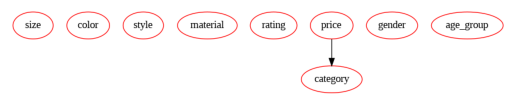

In [ ]:
bnet = BayesianNetwork.from_samples(df, algorithm='greedy')
bnet.structure

colnames  = df.columns
for i in range(df.shape[1]):
  bnet.states[i].name = colnames[i]
bnet.plot()

Попытка сгенерить ни к чему не привела. Ищем данные

In [ ]:
П